In [198]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
# sys.path.append('/home/pedrorozin/scripts/python') #uncomment para agregar el path. yo lo tengo instalado en mi venv
import funciones_tesis as ft


## Comparación $\delta_m$ vs $\delta_{cdm}$ para distintos k's

### Con ini

In [4]:
path = '/home/pedrorozin/scripts/class_public/delta_prime_cdm.txt'
ini_path = '/home/pedrorozin/scripts/class_public/test_delta_prime_gauge_newtonian.ini'
params = ft.read_ini_params(ini_path)
Omega_cdm = params['Omega_cdm']
Omega_b = params['Omega_b']
Omega_m = Omega_cdm + Omega_b



In [5]:
df = ft.read_adhoc_txt(path)
delta_m = ft.compute_delta_m(df['delta_cdm'], df['delta_b'], Omega_cdm, Omega_b)
df['delta_m'] = delta_m
df = ft.deriv_tau_to_a(df, 'delta_dot_cdm')
df = ft.deriv_tau_to_a(df, 'delta_dot_b')
df['delta_prime_m'] = ft.compute_delta_m(df['delta_prime_cdm'], df['delta_prime_b'], Omega_cdm, Omega_b)

print(params)
df.head()

{'k_output_values': 0.001, 'Omega_b': 0.05, 'Omega_cdm': 0.25, 'h': 0.68, 'A_s': 2e-09, 'n_s': 0.965, 'tau_reio': 0.05430842, 'YHe': 0.2454}


,delta_cdm,delta_dot_cdm,delta_b,delta_dot_b,a,k,H,delta_m,delta_prime_cdm,delta_prime_b,delta_prime_m
0,-0.902691,-0.016829,-0.902691,-0.016826,4.696919e-07,0.321755,4.596494,-0.902691,-7795.038852,-7793.616855,-7794.801852
1,-0.902604,-0.025761,-0.902604,-0.025756,2.996558e-07,0.504188,7.202691,-0.902604,-11935.525279,-11933.296702,-11935.153849
2,-0.902804,-0.011783,-0.902804,-0.011781,6.912142e-07,0.218718,3.124542,-0.902804,-5455.780125,-5454.817040,-5455.619611
3,-0.902591,-0.027996,-0.902591,-0.027990,2.747651e-07,0.549840,7.854850,-0.902591,-12971.512699,-12969.080160,-12971.107276
4,-0.902654,-0.019656,-0.902654,-0.019652,3.981810e-07,0.379495,5.421354,-0.902654,-9105.605541,-9103.933223,-9105.326822


/tmp/ipykernel_765/638550011.py:62: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set_ylim(-4)


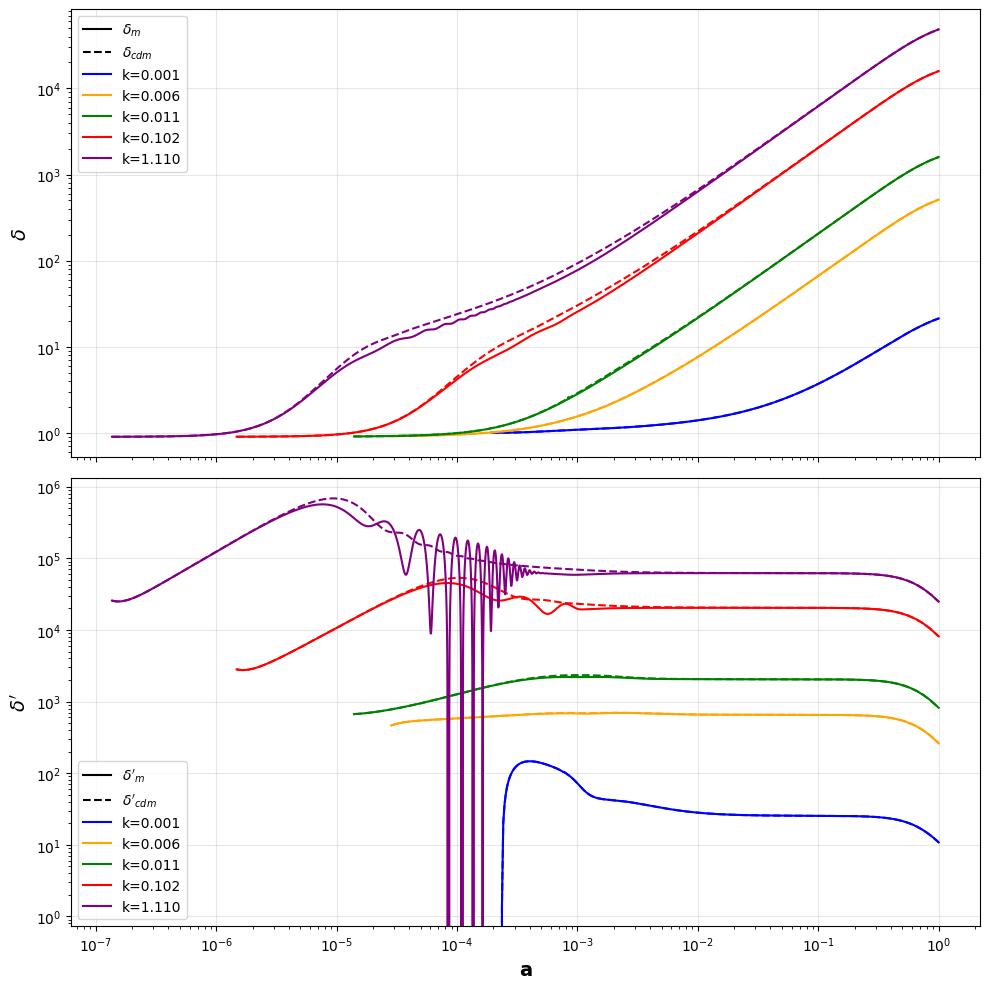

In [6]:
#import Line2D
from matplotlib.lines import Line2D
k_thresholds = [0.001,.005,.01, .1, 1]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
# lista_dif_rel =[]
arrs_difs = np.zeros((len(k_thresholds), len(df['a'].unique())))

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
line_style_elements = [
    Line2D([0], [0], color='black', linestyle='-', label='$\delta_m$'),
    Line2D([0], [0], color='black', linestyle='--', label='$\delta_{cdm}$')
]
line_style_elements2 = [
    Line2D([0], [0], color='black', linestyle='-', label='$\delta\'_m$'),
    Line2D([0], [0], color='black', linestyle='--', label='$\delta\'_{cdm}$')
]
color_elements =[]

for i, k_th in enumerate(k_thresholds):
    df_filtered = df[df['k'] >= k_th]
    if df_filtered.empty:
        print(f"No hay k >= {k_th}")
        continue
    k_sel = df_filtered['k'].min()
    df_k = df[df['k'] == k_sel].copy()
    df_k = df_k.sort_values(by='a').reset_index(drop=True)
    #delete duplicates
    df_k = df_k.drop_duplicates(subset=['a'], keep='last')
    color = colors[i]
    dif = ft.percent_diff_vs_class(df_k['a'], df_k['delta_m'], df_k['a'], df_k['delta_cdm'])
    # lista_dif_rel.append(dif)
    # arrs_difs[i, :] = dif
    dic_difs = {f'k={k_sel:<.3f}': dif}

    axs[0].plot(
        df_k['a'], -df_k['delta_m'],linestyle ='-', color=color
        )
    axs[0].plot(
        df_k['a'], -df_k['delta_cdm'], '--', color=color
    )
    axs[1].plot(
        df_k['a'], -df_k['delta_prime_m'], linestyle='-', color=color
    )
    axs[1].plot(
        df_k['a'], -df_k['delta_prime_cdm'], '--', color=color
	)
    # append color legends
    color_elements.append(
        Line2D([0], [0], color=color, linestyle='-', label=f'k={k_sel:<.3f}'))
    


axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[0].set_ylabel('$\delta$', fontweight='bold', fontsize=14)
axs[1].set_xlabel('a', fontweight='bold', fontsize=14)
axs[1].set_ylabel('$\delta\'$', fontweight='bold', fontsize=14)
axs[0].grid(alpha=0.3)
axs[1].grid(alpha=0.3)
axs[0].set_ylim(-4)

# Combinar ambas leyendas en axs[0]
axs[0].legend(handles=line_style_elements + color_elements)
axs[1].legend(handles=line_style_elements2 + color_elements)


plt.tight_layout()

#save fig in outputs_pedro
# plt.savefig('/home/pedrorozin/scripts/outputs_pedro/comparaciones_delta_prime_cdm.png', dpi=300, bbox_inches='tight')
plt.show()

Diferencia relativa

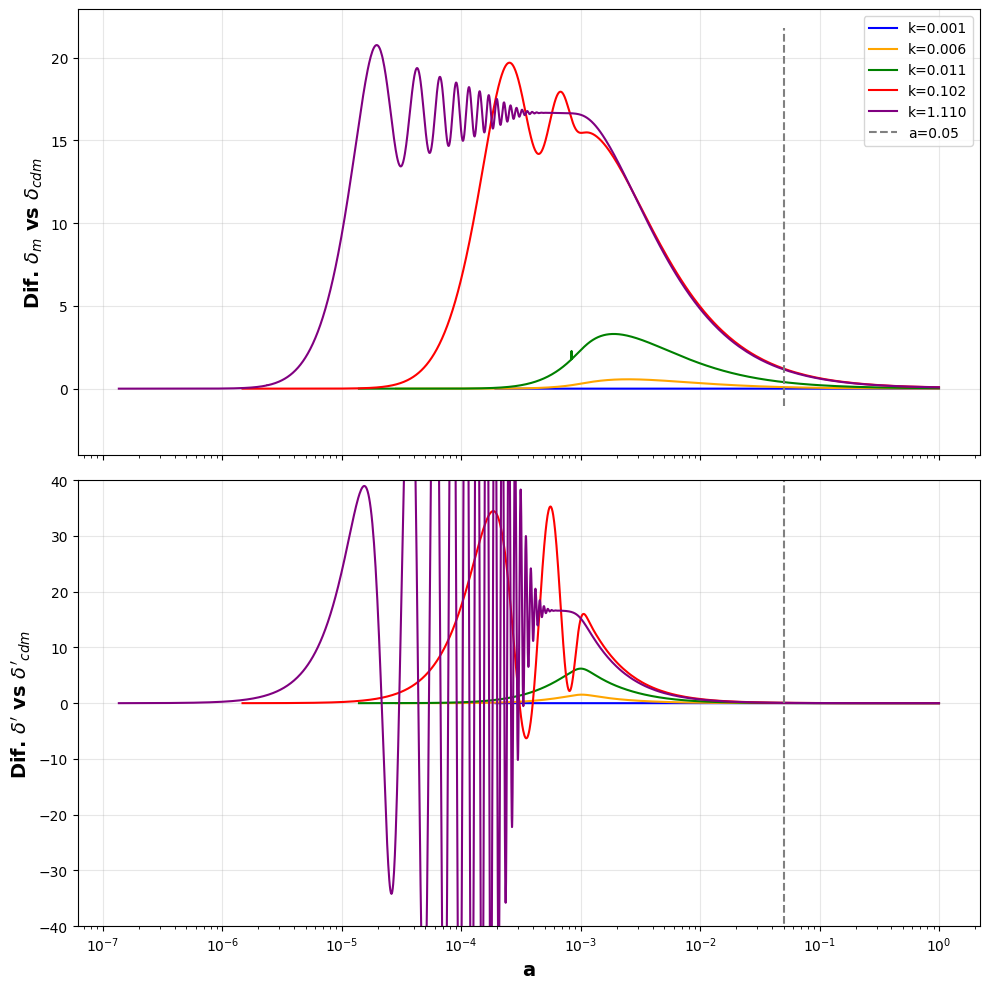

In [102]:
k_thresholds = [0.001,.005,.01, .1, 1]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
# lista_dif_rel =[]
arrs_difs = np.zeros((len(k_thresholds), len(df['a'].unique())))

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

for i, k_th in enumerate(k_thresholds):
    df_filtered = df[df['k'] >= k_th]
    if df_filtered.empty:
        print(f"No hay k >= {k_th}")
        continue
    k_sel = df_filtered['k'].min()
    df_k = df[df['k'] == k_sel].copy()
    df_k = df_k.sort_values(by='a').reset_index(drop=True)
    #delete duplicates
    df_k = df_k.drop_duplicates(subset=['a'], keep='last')
    color = colors[i]
    # dif = ft.percent_diff_vs_class(df_k['a'], df_k['delta_m'], df_k['a'], df_k['delta_cdm'])
    dif = ft.percent_diff_vs_class(df_k['a'], df_k['delta_cdm'], df_k['a'], df_k['delta_m'])
    # dif_primes = ft.percent_diff_vs_class(df_k['a'], df_k['delta_prime_m'], df_k['a'], df_k['delta_prime_cdm'])
    dif_primes = ft.percent_diff_vs_class(df_k['a'], df_k['delta_prime_cdm'], df_k['a'], df_k['delta_prime_m'])
    dic_difs = {f'k={k_sel:<.3f}': dif}

    axs[0].plot(
        df_k['a'], dif,linestyle ='-', color=color, label = {f'k={k_sel:<.3f}'}
        )
    axs[1].plot(
        df_k['a'], dif_primes, linestyle='-', color=color, label = {f'k={k_sel:<.3f}'}
    ) 

axs[0].set_xscale('log')
#vertical line in a=.05
axs[0].vlines(0.05, *axs[0].get_ylim(), color='gray', linestyle='--', label='a=0.05')   
axs[1].vlines(0.05, *axs[1].get_ylim(), color='gray', linestyle='--', label='a=0.05')

axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[0].set_ylabel('Dif. $\delta_m$ vs $\delta_{cdm}$', fontweight='bold', fontsize=14)
axs[1].set_xlabel('a', fontweight='bold', fontsize=14)
axs[1].set_ylabel('Dif. $\delta\'$ vs $\delta\'_{cdm}$', fontweight='bold', fontsize=14)
axs[0].grid(alpha=0.3)
axs[1].grid(alpha=0.3)
axs[0].set_ylim(-4)
axs[1].set_ylim(-40,40)

# Combinar ambas leyendas en axs[0]
axs[0].legend()
# axs[0].legend(handles=line_style_elements + color_elements)
axs[0].legend()
# axs[1].legend(handles=line_style_elements2 + color_elements)


plt.tight_layout()

# plt.savefig('/home/pedrorozin/scripts/outputs_pedro/comparaciones_deltas.png')
plt.show()

In [104]:
#print dif when a=0.05
dif_at_005 = dif[np.argmin(np.abs(df_k['a'] - 0.05))]
print(f'Dif. delta_cdm vs delta_m at a=0.05: {dif_at_005}')

Dif. delta_cdm vs delta_m at a=0.05: 1.267186741502144


## Comparación $\delta_{cdm}$ con $\delta_b$

In [10]:
path = '/home/pedrorozin/scripts/class_public/delta_prime_cdm.txt'
ini_path = '/home/pedrorozin/scripts/class_public/test_delta_prime_gauge_newtonian.ini'
params = ft.read_ini_params(ini_path)
Omega_cdm = params['Omega_cdm']
Omega_b = params['Omega_b']
Omega_m = Omega_cdm + Omega_b

df = ft.read_adhoc_txt(path)
delta_m = ft.compute_delta_m(df['delta_cdm'], df['delta_b'], Omega_cdm, Omega_b)
df['delta_m'] = delta_m
df = ft.deriv_tau_to_a(df, 'delta_dot_cdm')
df = ft.deriv_tau_to_a(df, 'delta_dot_b')
df['delta_prime_m'] = ft.compute_delta_m(df['delta_prime_cdm'], df['delta_prime_b'], Omega_cdm, Omega_b)

print(params)
df.head()

{'k_output_values': 0.001, 'Omega_b': 0.05, 'Omega_cdm': 0.25, 'h': 0.68, 'A_s': 2e-09, 'n_s': 0.965, 'tau_reio': 0.05430842, 'YHe': 0.2454}


,delta_cdm,delta_dot_cdm,delta_b,delta_dot_b,a,k,H,delta_m,delta_prime_cdm,delta_prime_b,delta_prime_m
0,-0.902691,-0.016829,-0.902691,-0.016826,4.696919e-07,0.321755,4.596494,-0.902691,-7795.038852,-7793.616855,-7794.801852
1,-0.902604,-0.025761,-0.902604,-0.025756,2.996558e-07,0.504188,7.202691,-0.902604,-11935.525279,-11933.296702,-11935.153849
2,-0.902804,-0.011783,-0.902804,-0.011781,6.912142e-07,0.218718,3.124542,-0.902804,-5455.780125,-5454.817040,-5455.619611
3,-0.902591,-0.027996,-0.902591,-0.027990,2.747651e-07,0.549840,7.854850,-0.902591,-12971.512699,-12969.080160,-12971.107276
4,-0.902654,-0.019656,-0.902654,-0.019652,3.981810e-07,0.379495,5.421354,-0.902654,-9105.605541,-9103.933223,-9105.326822


/tmp/ipykernel_765/1759333880.py:61: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set_ylim(-4)


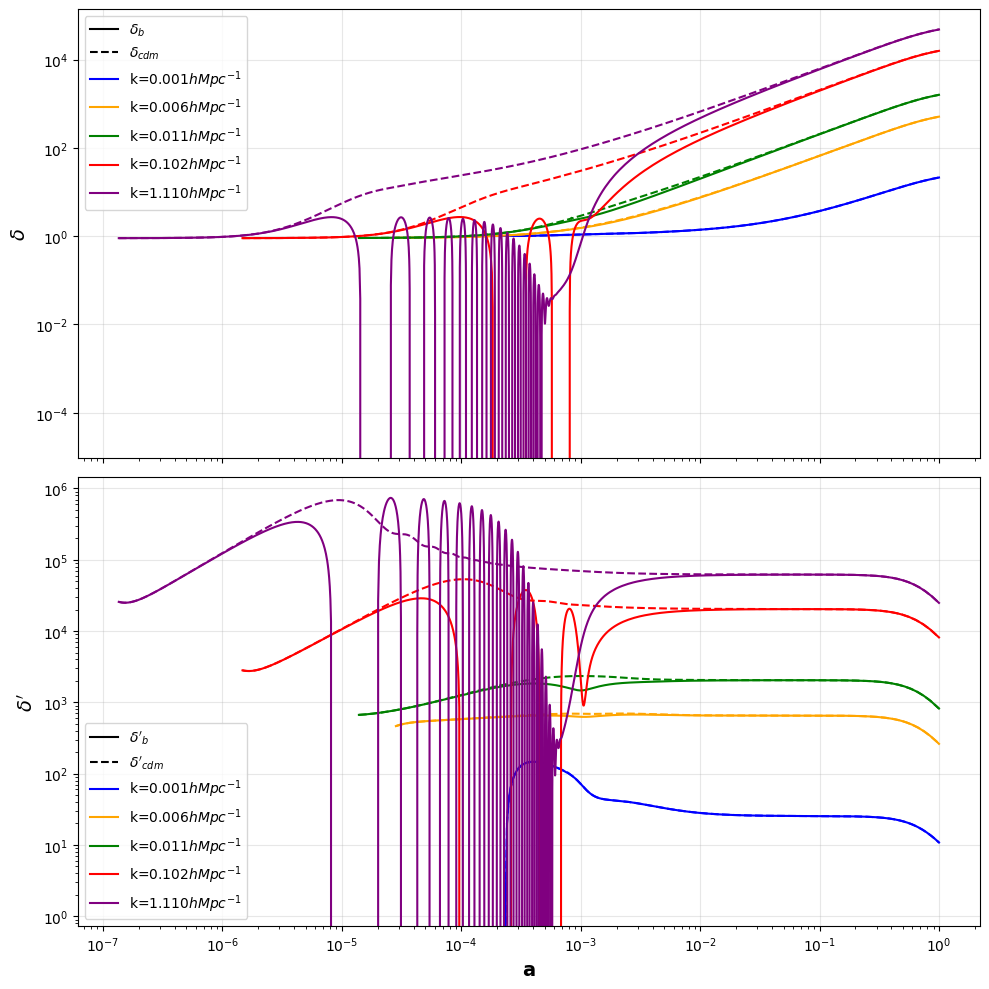

In [12]:
#import Line2D
from matplotlib.lines import Line2D
k_thresholds = [0.001,.005,.01, .1, 1]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
# lista_dif_rel =[]
arrs_difs = np.zeros((len(k_thresholds), len(df['a'].unique())))

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
line_style_elements = [
    Line2D([0], [0], color='black', linestyle='-', label='$\delta_b$'),
    Line2D([0], [0], color='black', linestyle='--', label='$\delta_{cdm}$')
]
line_style_elements2 = [
    Line2D([0], [0], color='black', linestyle='-', label='$\delta\'_b$'),
    Line2D([0], [0], color='black', linestyle='--', label='$\delta\'_{cdm}$')
]
color_elements =[]

for i, k_th in enumerate(k_thresholds):
    df_filtered = df[df['k'] >= k_th]
    if df_filtered.empty:
        print(f"No hay k >= {k_th}")
        continue
    k_sel = df_filtered['k'].min()
    df_k = df[df['k'] == k_sel].copy()
    df_k = df_k.sort_values(by='a').reset_index(drop=True)
    #delete duplicates
    df_k = df_k.drop_duplicates(subset=['a'], keep='last')
    color = colors[i]
    dif = ft.percent_diff_vs_class(df_k['a'], df_k['delta_b'], df_k['a'], df_k['delta_cdm'])
    # lista_dif_rel.append(dif)
    # arrs_difs[i, :] = dif
    dic_difs = {f'k={k_sel:<.3f}': dif}

    axs[0].plot(
        df_k['a'], -df_k['delta_b'],linestyle ='-', color=color
        )
    axs[0].plot(
        df_k['a'], -df_k['delta_cdm'], '--', color=color
    )
    axs[1].plot(
        df_k['a'], -df_k['delta_prime_b'], linestyle='-', color=color
    )
    axs[1].plot(
        df_k['a'], -df_k['delta_prime_cdm'], '--', color=color
	)
    # append color legends
    color_elements.append(
        Line2D([0], [0], color=color, linestyle='-', label=f'k={k_sel:<.3f}'+r'$hMpc^{-1}$'))


axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[0].set_ylabel('$\delta$', fontweight='bold', fontsize=14)
axs[1].set_xlabel('a', fontweight='bold', fontsize=14)
axs[1].set_ylabel('$\delta\'$', fontweight='bold', fontsize=14)
axs[0].grid(alpha=0.3)
axs[1].grid(alpha=0.3)
axs[0].set_ylim(-4)

# Combinar ambas leyendas en axs[0]
axs[0].legend(handles=line_style_elements + color_elements)
axs[1].legend(handles=line_style_elements2 + color_elements)


plt.tight_layout()

#save fig in outputs_pedro
# plt.savefig('/home/pedrorozin/scripts/outputs_pedro/comparaciones_delta_prime_cdm_vs_b.png', dpi=300, bbox_inches='tight')
plt.show()

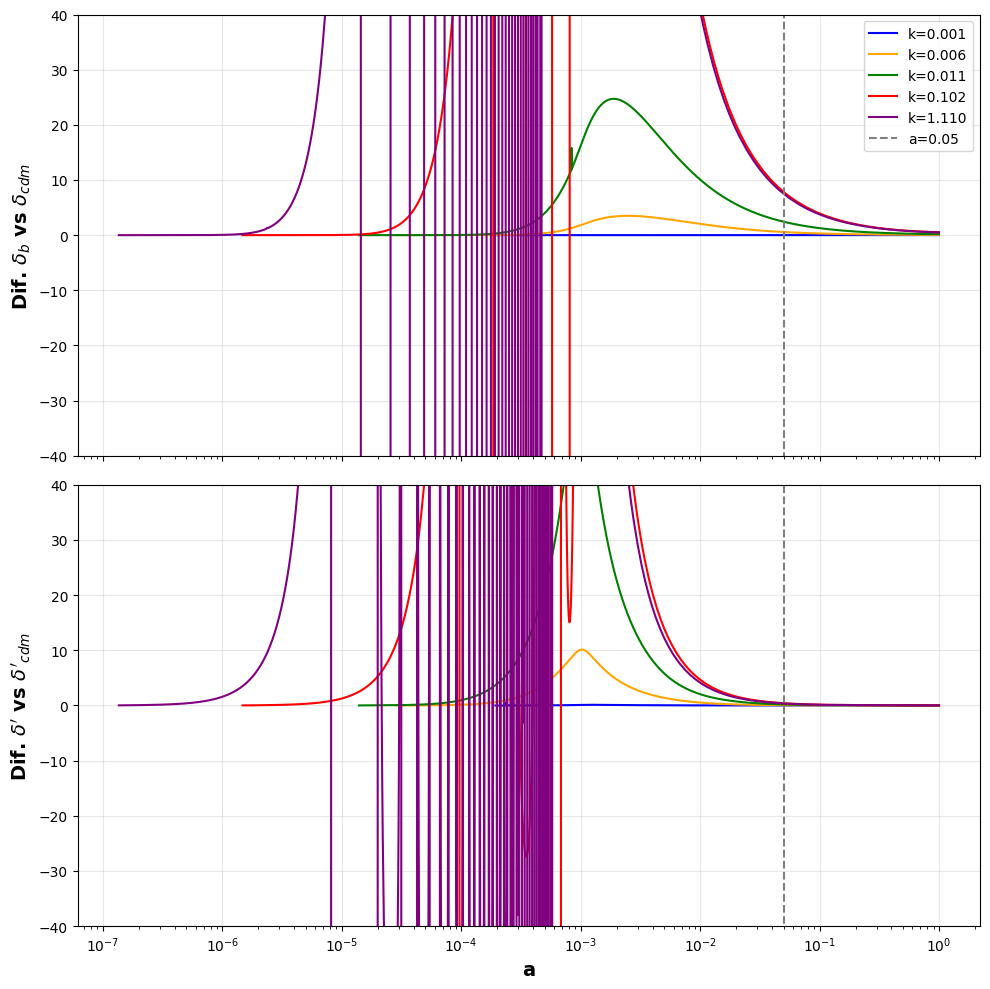

In [13]:
k_thresholds = [0.001,.005,.01, .1, 1]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
# lista_dif_rel =[]
arrs_difs = np.zeros((len(k_thresholds), len(df['a'].unique())))

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

for i, k_th in enumerate(k_thresholds):
    df_filtered = df[df['k'] >= k_th]
    if df_filtered.empty:
        print(f"No hay k >= {k_th}")
        continue
    k_sel = df_filtered['k'].min()
    df_k = df[df['k'] == k_sel].copy()
    df_k = df_k.sort_values(by='a').reset_index(drop=True)
    #delete duplicates
    df_k = df_k.drop_duplicates(subset=['a'], keep='last')
    color = colors[i]
    dif = ft.percent_diff_vs_class(df_k['a'], df_k['delta_b'], df_k['a'], df_k['delta_cdm'])
    dif_primes = ft.percent_diff_vs_class(df_k['a'], df_k['delta_prime_b'], df_k['a'], df_k['delta_prime_cdm'])
    dic_difs = {f'k={k_sel:<.3f}': dif}

    axs[0].plot(
        df_k['a'], -dif,linestyle ='-', color=color, label = {f'k={k_sel:<.3f}'}
        )
    axs[1].plot(
        df_k['a'], -dif_primes, linestyle='-', color=color, label = {f'k={k_sel:<.3f}'}
    )

axs[0].set_xscale('log')
#vertical line in a=.05
axs[0].vlines(0.05, *axs[0].get_ylim(), color='gray', linestyle='--', label='a=0.05')   
axs[1].vlines(0.05, *axs[1].get_ylim(), color='gray', linestyle='--', label='a=0.05')

axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[0].set_ylabel('Dif. $\delta_b$ vs $\delta_{cdm}$', fontweight='bold', fontsize=14)
axs[1].set_xlabel('a', fontweight='bold', fontsize=14)
axs[1].set_ylabel('Dif. $\delta\'$ vs $\delta\'_{cdm}$', fontweight='bold', fontsize=14)
axs[0].grid(alpha=0.3)
axs[1].grid(alpha=0.3)
axs[0].set_ylim(-40, 40)
axs[1].set_ylim(-40,40)

# Combinar ambas leyendas en axs[0]
axs[0].legend()
# axs[0].legend(handles=line_style_elements + color_elements)
axs[0].legend()
# axs[1].legend(handles=line_style_elements2 + color_elements)


plt.tight_layout()

# plt.savefig('/home/pedrorozin/scripts/outputs_pedro/comparaciones_deltas.png')
plt.show()

## Comparacion deltas con integral numérica a partir de CI's de $\delta_m$ y $\delta_{cdm}$ 

In [217]:
path_grilla = '/home/pedrorozin/scripts/grilla_results_x11_2.csv'
df = pd.read_csv(path_grilla)
# #eliminar rows duplicadas en el df
# df = df.drop_duplicates()
#check if there are duplicates rows:
columns_iterated = ['k', 'A_s', 'h', 'Omega_m']
df_iterated = df[df.duplicated(subset=columns_iterated, keep=False)]
# df['k h'] = df['k'] * df['h']
# df[df.duplicated()]
# df_iterated
df


,a,k,k h,Omega_cdm,Omega_b,Omega_m,A_s,h,k_horizon,sigma8,delta_cdm,delta_b,delta_m,delta_prime_cdm,delta_prime_b,delta_prime_m
0,0.050046,0.092803,0.060322,0.251323,0.048677,0.3,1.900000e-09,0.65,0.005144,0.729781,-973.43460,-915.74650,-964.074254,-19183.460768,-19127.612530,-19174.398954
1,0.050093,0.047531,0.030895,0.251323,0.048677,0.3,1.900000e-09,0.65,0.005144,0.729781,-582.48700,-555.02420,-578.030946,-11486.352176,-11464.968975,-11482.882584
2,0.050123,0.242119,0.157378,0.251323,0.048677,0.3,1.900000e-09,0.65,0.005144,0.729781,-1673.26800,-1553.52100,-1653.838111,-32865.857203,-32741.321816,-32845.650361
3,0.050134,0.010000,0.006500,0.251323,0.048677,0.3,1.900000e-09,0.65,0.005144,0.729781,-93.84715,-91.83301,-93.520340,-1842.288961,-1839.172175,-1841.783238
4,0.050137,0.013354,0.008680,0.251323,0.048677,0.3,1.900000e-09,0.65,0.005144,0.729781,-142.53690,-137.10690,-141.655840,-2800.954950,-2792.840868,-2799.638376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111953,0.057124,0.160994,0.120746,0.351323,0.048677,0.4,2.900000e-09,0.75,0.005936,1.284073,-1983.68000,-1882.68500,-1971.389578,-34438.847465,-34357.254397,-34428.918129
111954,0.057225,0.098216,0.073662,0.351323,0.048677,0.4,2.900000e-09,0.75,0.005936,1.284073,-1344.28900,-1277.18700,-1336.123131,-23297.287780,-23247.217479,-23291.194556
111955,0.057583,0.123742,0.092806,0.351323,0.048677,0.4,2.900000e-09,0.75,0.005936,1.284073,-1619.50200,-1519.27600,-1607.305160,-27857.290350,-27766.925185,-27846.293508
111956,0.057832,0.239110,0.179332,0.351323,0.048677,0.4,2.900000e-09,0.75,0.005936,1.284073,-2586.03700,-2437.99100,-2568.020783,-44316.957738,-44193.048268,-44301.878776


In [218]:
unique_ks = df['k'].unique()
print(f'Cantidad de k únicos: {len(unique_ks)}')
print(f'k uniques: {np.sort(unique_ks)}')

Cantidad de k únicos: 10054
k uniques: [0.0072982  0.00739347 0.00739911 ... 1.252418   1.253626   1.254538  ]


In [219]:
#generar funcion para encontrar df con valores omega_m, h y A_s
def find_closest_params(df, Omega_m, h, A_s):
    """
    Encuentra la fila en el DataFrame que tiene los valores más cercanos a los
    parámetros dados (Omega_m, h, A_s).
    """
    df_filtered = df[
        (df['Omega_m'] == Omega_m) &
        (df['h'] == h) &
        (df['A_s'] == A_s)
    ]
    return df_filtered

df_closest = find_closest_params(df, Omega_m=0.3, h=0.68, A_s=1.9e-9)
df_closest = df_closest.sort_values(by='k').reset_index(drop=True)
#min k
# df_closest = df_closest[df_closest['k'] == df_closest['k'].min()].reset_index(drop=True)
#filter by closest to k h =0.2
idx_min = (abs(df_closest['k'] * df_closest['h'] - 0.2)).idxmin()
df_closest = df_closest.loc[[idx_min]].reset_index(drop=True)

df_closest

,a,k,k h,Omega_cdm,Omega_b,Omega_m,A_s,h,k_horizon,sigma8,delta_cdm,delta_b,delta_m,delta_prime_cdm,delta_prime_b,delta_prime_m
0,0.054911,0.297995,0.202637,0.251323,0.048677,0.3,1.900000e-09,0.68,0.005145,0.767765,-2105.02,-1970.253,-2083.152999,-37809.361894,-37688.805173,-37789.800622


In [220]:
def filter_df(df, Omega_m=0.3, h=0.68, A_s=1.9e-9, k=0.01):
    """
    Selecciona la fila con k>=k y cuyos parámetros (Omega_m, h, A_s) sean 
    los más cercanos a los indicados, midiendo distancia euclídea.
    """

    # Calcular distancia euclídea en el espacio de parámetros
    # df_k = df[df['k'] >= k].copy()
    df_k = df.copy()
    if df_k.empty:
        raise ValueError("No hay filas con 'k' >= {}".format(k))
    
    
    
    # df_k = df_k[df_k['k']== df_k['k'].min()]
    df_k = df_k[(df_k['A_s'] == A_s)]
    df_k = df_k[(df_k['h'] == h)]
    df_k = df_k[(df_k['Omega_m'] == Omega_m)]
    df_k = df_k.sort_values(by='k').reset_index(drop=True)
    df_k = df_k[df_k['k'] == df_k['k'].min()]
    if not df_k.empty:
        row = df_k.iloc[0]
        # df_min = df_min.to_frame().T  # Convertir a DataFrame de una fila
        return row
    else:
        raise ValueError("No se encontró una fila que cumpla con los criterios.")

In [221]:
#round Omega_m
df['h'] = df['h'].round(2)
df['Omega_m'] = df['Omega_m'].round(2)
df['A_s'] = df['A_s'].round(10)
uniques_Omega = df['Omega_m'].unique()
print(uniques_Omega)
for om in np.sort(uniques_Omega):
	uniques_ks_for_omega = df[df['Omega_m'] == om]['k'].unique()
	print(f'for Omega_m = {om}, k values are: {np.sort(uniques_ks_for_omega)}')
	print(f'uniques vals of A_s: {np.sort(df[df["Omega_m"] == om]["A_s"].unique())}')
	print(f'uniques vals of h: {np.sort(df[df["Omega_m"] == om]["h"].unique())}')
	print("")





[0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 ]
for Omega_m = 0.3, k values are: [0.0072982  0.00739911 0.00750002 0.00760094 0.00770185 0.00842565
 0.00855269 0.00867972 0.00880676 0.0089338  0.00906085 0.00918789
 0.00931493 0.00944197 0.00956901 0.00969606 0.01       0.01060726
 0.01076719 0.01092713 0.01108706 0.01124699 0.01140693 0.01156686
 0.0117268  0.01188674 0.01204667 0.01220661 0.01335375 0.01355509
 0.01375644 0.01395778 0.01415913 0.01436047 0.01456182 0.01476317
 0.01496452 0.01516586 0.01536721 0.01681133 0.01706479 0.01731826
 0.01757173 0.0178252  0.01807867 0.01833214 0.0185856  0.01883907
 0.01909254 0.01934601 0.02115622 0.02147442 0.02179256 0.02211066
 0.0224287  0.02274669 0.02306464 0.02338254 0.0237004  0.02401822
 0.024336   0.02634401 0.02672216 0.02709967 0.02747661 0.02785302
 0.02822896 0.0286045  0.02897968 0.02935456 0.02972919 0.03010363
 0.03087148 0.03125913 0.03164723 0.03203585 0.03242507 0.03281497
 0.0332056  0.03359703 0.03398929 0.034

In [222]:
#uniques k's in df
df1 =df[df['Omega_m']== 0.3].copy()
print(len(df1['k'].unique()))
print(df1['k'])

919
0        0.092803
1        0.047531
2        0.242119
3        0.010000
4        0.013354
           ...   
10214    0.544121
10215    0.475233
10216    0.374002
10217    0.427377
10218    0.180070
Name: k, Length: 10219, dtype: float64


In [223]:
df_filtered = filter_df(df, Omega_m=0.3, h=0.68, A_s=2.8e-09)
display(df_filtered)

a                  5.034963e-02
k                  8.806765e-03
k h                5.988600e-03
Omega_cdm          2.513227e-01
Omega_b            4.867735e-02
Omega_m            3.000000e-01
A_s                2.800000e-09
h                  6.800000e-01
k_horizon          5.144965e-03
sigma8             9.320309e-01
delta_cdm         -7.325511e+01
delta_b           -7.216091e+01
delta_m           -7.307757e+01
delta_prime_cdm   -1.429068e+03
delta_prime_b     -1.427377e+03
delta_prime_m     -1.428793e+03
Name: 0, dtype: float64

Parámetros: Om_m = 0.3, sigma8 = 0.7677646305779069, k = 0.2979953
Condiciones iniciales: delta_0 = -2083.1529986658607, delta_prime_0 = -37789.80062192636
Condiciones iniciales CDM: delta_0_cdm = -2105.02, delta_prime_0_cdm = -37809.361894195725
Integración completada:
- Rango de 'a': 0.055 - 1.000
- Rango de delta: -29457.659447 - -2083.152999
- Rango de delta_prime: -37789.800622 - -15105.177296


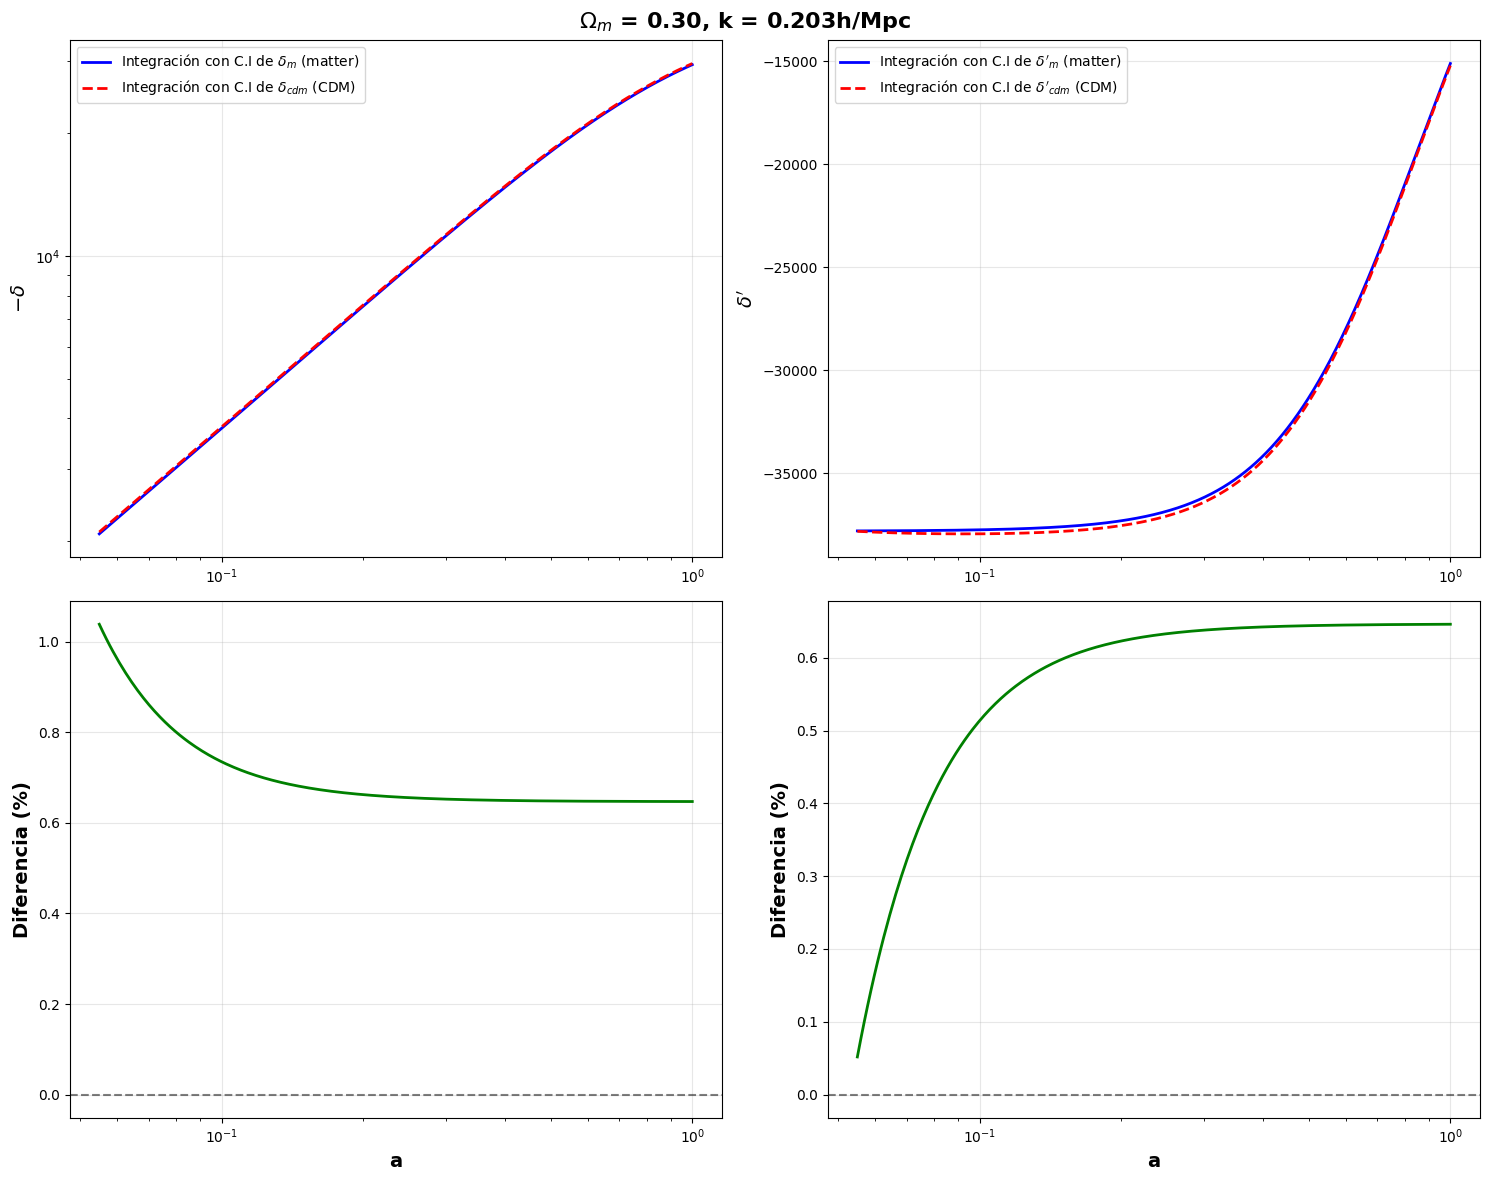

Diferencias en delta:
  - Máxima: 1.039%
  - Promedio: 0.662%
Diferencias en delta_prime:
  - Máxima: 0.646%
  - Promedio: 0.623%


In [224]:
# Usar la clase NumericalIntegrator con datos reales del DataFrame filtrado
from funciones_tesis import NumericalIntegrator
df_filtered = df_closest.iloc[0]  # Seleccionar la primera fila del DataFrame filtrado
# Obtener parámetros del DataFrame filtrado
Om_m = df_filtered['Omega_m']
sigma8 = df_filtered['sigma8']
k_value = df_filtered['k']
a_ini = df_filtered['a']
A_s = df_filtered['A_s']
h= df_filtered['h']

print(f"Parámetros: Om_m = {Om_m}, sigma8 = {sigma8}, k = {k_value}")

# Crear el integrador con los parámetros reales
integrator = NumericalIntegrator(
    Om_m_0=Om_m, 
    sigma8=sigma8,
    a_0=a_ini,
    a_f=1.0,
    n_points=1000
)

# Condiciones iniciales (usando valores del DataFrame filtrado)
delta_0 = df_filtered['delta_m']
delta_prime_0 = df_filtered['delta_prime_m']

delta_0_cdm = df_filtered['delta_cdm']
delta_prime_0_cdm = df_filtered['delta_prime_cdm']

print(f"Condiciones iniciales: delta_0 = {delta_0}, delta_prime_0 = {delta_prime_0}")
print(f"Condiciones iniciales CDM: delta_0_cdm = {delta_0_cdm}, delta_prime_0_cdm = {delta_prime_0_cdm}")

# Realizar la integración
a_vec, delta_vals, delta_prime_vals = integrator.integrate(delta_0, delta_prime_0)
a_vec_cdm, delta_vals_cdm, delta_prime_vals_cdm = integrator.integrate(delta_0_cdm, delta_prime_0_cdm)

print(f"Integración completada:")
print(f"- Rango de 'a': {a_vec.min():.3f} - {a_vec.max():.3f}")
print(f"- Rango de delta: {delta_vals.min():.6f} - {delta_vals.max():.6f}")
print(f"- Rango de delta_prime: {delta_prime_vals.min():.6f} - {delta_prime_vals.max():.6f}")

# Calcular diferencias relativas
diff_delta = ft.percent_diff_vs_class(a_vec, delta_vals_cdm, a_vec, delta_vals)
diff_delta_prime = ft.percent_diff_vs_class(a_vec, delta_prime_vals_cdm, a_vec, delta_prime_vals)

# Crear gráfico 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Fila superior: Comparación de curvas
# Delta vs a (arriba izquierda)
axs[0, 0].plot(a_vec, -delta_vals, 'b-', linewidth=2, label='Integración con C.I de $\delta_m$ (matter)')
axs[0, 0].plot(a_vec_cdm, -delta_vals_cdm, 'r--', linewidth=2, label='Integración con C.I de $\delta_{cdm}$ (CDM)')
axs[0, 0].set_ylabel('$-\delta$', fontweight='bold', fontsize=14)
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].grid(alpha=0.3)
axs[0, 0].legend()
# axs[0, 0].set_title('Evolución de $\delta$', fontweight='bold')

# Delta_prime vs a (arriba derecha)
axs[0, 1].plot(a_vec, delta_prime_vals, 'b-', linewidth=2, label='Integración con C.I de $\delta\'_m$ (matter)')
axs[0, 1].plot(a_vec_cdm, delta_prime_vals_cdm, 'r--', linewidth=2, label='Integración con C.I de $\delta\'_{cdm}$ (CDM)')
axs[0, 1].set_ylabel('$\delta\'$', fontweight='bold', fontsize=14)
axs[0, 1].set_xscale('log')
axs[0, 1].grid(alpha=0.3)
axs[0, 1].legend()
# axs[0, 1].set_title('Evolución de $\delta\'$', fontweight='bold')

# Fila inferior: Diferencias relativas
# Diferencia relativa delta (abajo izquierda)
axs[1, 0].plot(a_vec, diff_delta, 'g-', linewidth=2)
axs[1, 0].set_ylabel('Diferencia (%)', fontweight='bold', fontsize=14)
axs[1, 0].set_xlabel('a', fontweight='bold', fontsize=14)
axs[1, 0].set_xscale('log')
axs[1, 0].grid(alpha=0.3)
axs[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.5)
# axs[1, 0].set_title('Dif. relativa: $\delta_{cdm}$ vs $\delta_m$ (%)', fontweight='bold')

# Diferencia relativa delta_prime (abajo derecha)
axs[1, 1].plot(a_vec, diff_delta_prime, 'g-', linewidth=2)
axs[1, 1].set_ylabel('Diferencia (%)', fontweight='bold', fontsize=14)
axs[1, 1].set_xlabel('a', fontweight='bold', fontsize=14)
axs[1, 1].set_xscale('log')
axs[1, 1].grid(alpha=0.3)
axs[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.5)
# axs[1, 1].set_title('Dif. relativa: $\delta\'_{cdm}$ vs $\delta\'_m$ (%)', fontweight='bold')

# Título general
fig.suptitle(f'$\Omega_m$ = {Om_m:.2f}, k = {k_value * h:.3f}h/Mpc', 
             fontweight='bold', fontsize=16)

plt.tight_layout()
plt.show()

# Estadísticas de las diferencias
print(f"Diferencias en delta:")
print(f"  - Máxima: {abs(diff_delta).max():.3f}%")
print(f"  - Promedio: {abs(diff_delta).mean():.3f}%")
print(f"Diferencias en delta_prime:")
print(f"  - Máxima: {abs(diff_delta_prime).max():.3f}%")
print(f"  - Promedio: {abs(diff_delta_prime).mean():.3f}%")

### Comparaciones con integraciones numéricas

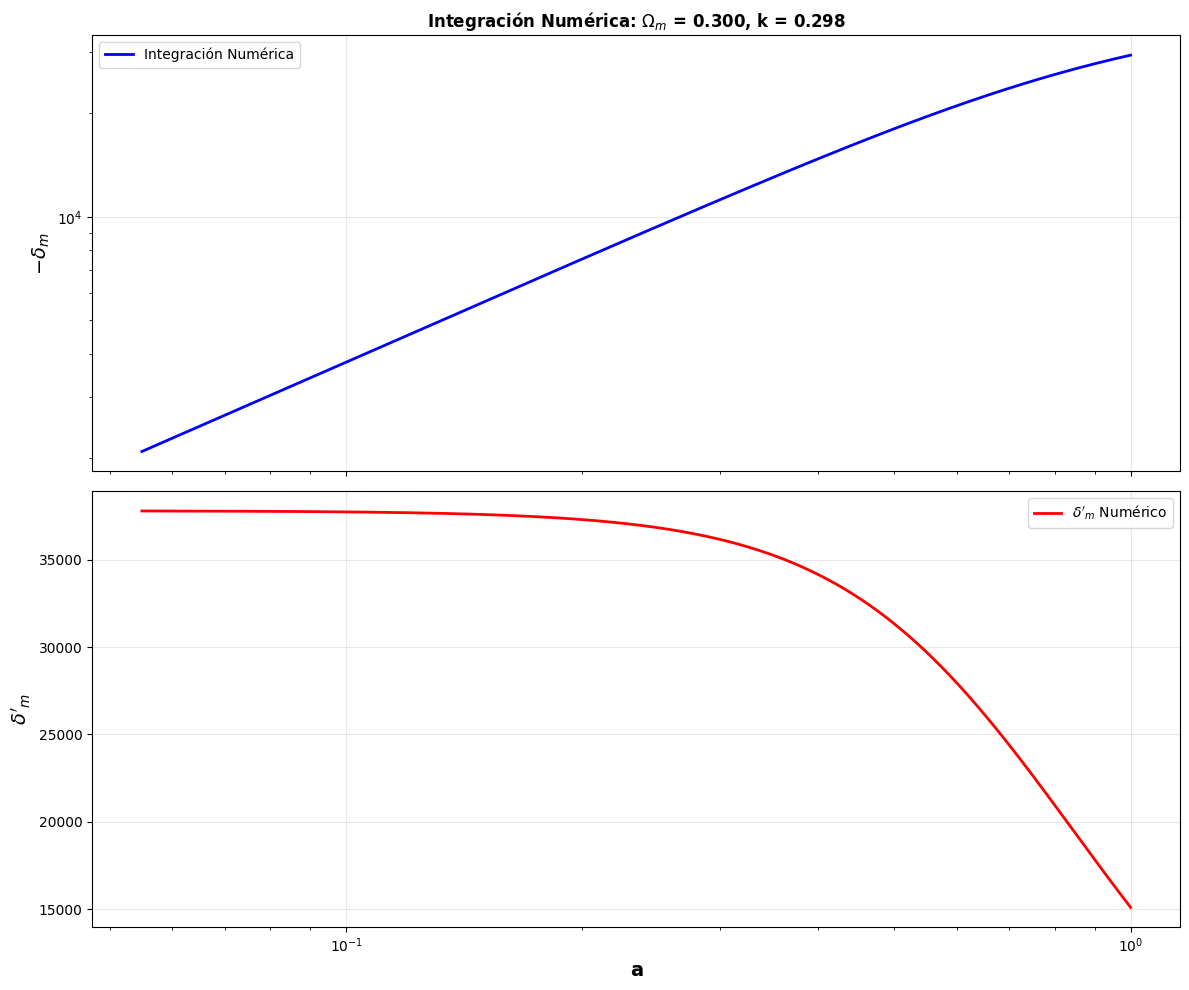

Primeras 5 filas del resultado:


,a,delta,delta_prime
0,0.054911,-2105.020000,-37809.361894
1,0.055857,-2140.793235,-37818.267039
2,0.056803,-2176.574626,-37826.609283
3,0.057749,-2212.363660,-37834.427574
4,0.058695,-2248.159859,-37841.757828


In [225]:
# Graficar resultados de la integración numérica
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot 1: Delta vs a
axs[0].plot(a_vec, -delta_vals, 'b-', linewidth=2, label='Integración Numérica')
axs[0].set_ylabel('$-\delta_m$', fontweight='bold', fontsize=14)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].grid(alpha=0.3)
axs[0].legend()
axs[0].set_title(f'Integración Numérica: $\Omega_m$ = {Om_m:.3f}, k = {k_value:.3f}', fontweight='bold')

# Plot 2: Delta_prime vs a  
axs[1].plot(a_vec, -delta_prime_vals, 'r-', linewidth=2, label='$\delta\'_m$ Numérico')
axs[1].set_ylabel('$\delta\'_m$', fontweight='bold', fontsize=14)
axs[1].set_xlabel('a', fontweight='bold', fontsize=14)
axs[1].set_xscale('log')
axs[1].grid(alpha=0.3)
axs[1].legend()

plt.tight_layout()
plt.show()

# Mostrar también como DataFrame
df_numerical = integrator.get_results_df()
print("Primeras 5 filas del resultado:")
display(df_numerical.head())

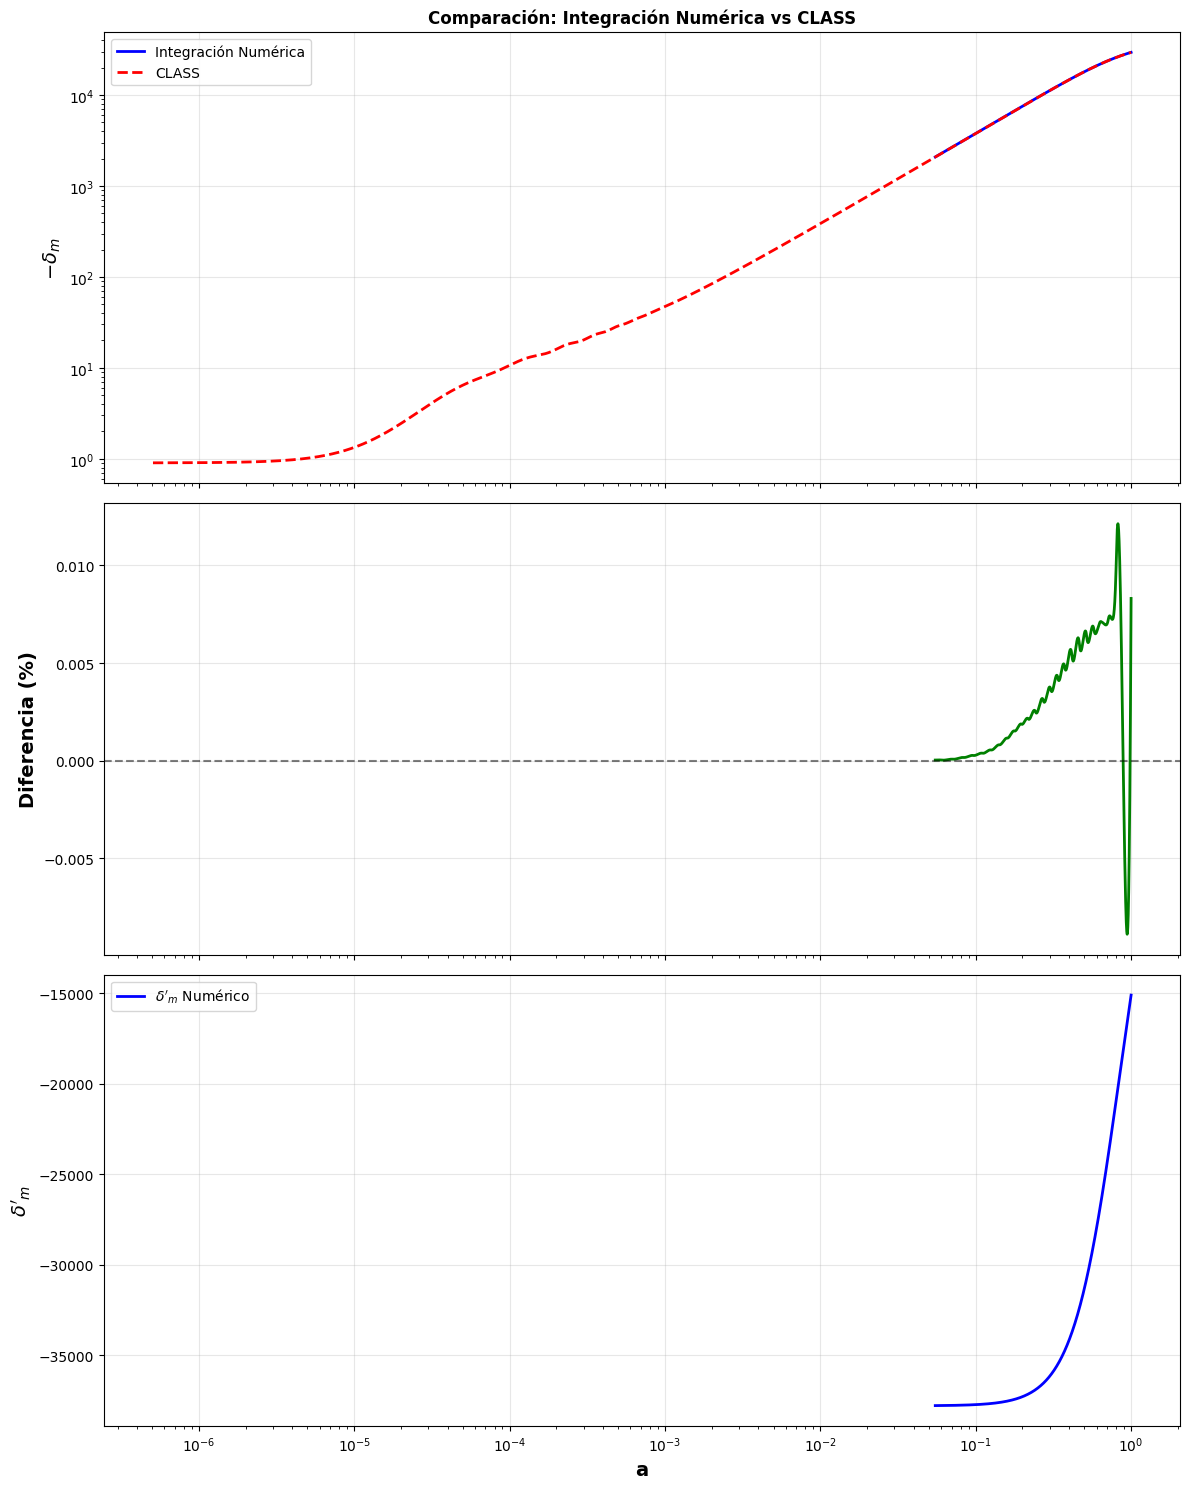

Diferencia máxima: 0.012%
Diferencia promedio: 0.005%


In [226]:
# Comparar con datos de CLASS - necesitamos generar datos de CLASS con los mismos parámetros
M_compare = ft.common_settings(
    k=k_value, 
    omega_m=Om_m, 
    A_s=A_s,  
    h=h     
)

df_class = ft.get_df_from_M(M_compare)
Om_b_compare = M_compare.Omega_b()
Om_cdm_compare = Om_m - Om_b_compare

# Calcular delta_matter para CLASS
df_class['delta_matter'] = ft.compute_delta_m(
    df_class['delta_cdm'], 
    df_class['delta_b'], 
    Om_cdm_compare, 
    Om_b_compare
)

# Comparación gráfica
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

axs[0].plot(a_vec, -delta_vals, 'b-', linewidth=2, label='Integración Numérica')
axs[0].plot(df_class['a'], -df_class['delta_matter'], 'r--', linewidth=2, label='CLASS')
axs[0].set_ylabel('$-\delta_m$', fontweight='bold', fontsize=14)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].grid(alpha=0.3)
axs[0].legend()
axs[0].set_title('Comparación: Integración Numérica vs CLASS', fontweight='bold')

# Plot 2: Diferencia porcentual
percent_diff = ft.percent_diff_vs_class(a_vec, delta_vals, df_class['a'], df_class['delta_matter'])
axs[1].plot(a_vec, percent_diff, 'g-', linewidth=2)
axs[1].set_ylabel('Diferencia (%)', fontweight='bold', fontsize=14)
axs[1].set_xscale('log')
axs[1].grid(alpha=0.3)
axs[1].axhline(y=0, color='k', linestyle='--', alpha=0.5)

# Plot 3: Delta_prime comparison (if we can calculate it for CLASS)
axs[2].plot(a_vec, delta_prime_vals, 'b-', linewidth=2, label='$\delta\'_m$ Numérico')
axs[2].set_ylabel('$\delta\'_m$', fontweight='bold', fontsize=14)
axs[2].set_xlabel('a', fontweight='bold', fontsize=14)
axs[2].set_xscale('log')
axs[2].grid(alpha=0.3)
axs[2].legend()

plt.tight_layout()
plt.show()

print(f"Diferencia máxima: {abs(percent_diff).max():.3f}%")
print(f"Diferencia promedio: {abs(percent_diff).mean():.3f}%")

In [227]:
asd


array([ -1556.19111324,  -1585.65341466,  -1615.11620426,  -1644.57942354,
        -1674.04301719,  -1703.50693307,  -1732.97112224,  -1762.43553829,
        -1791.90013714,  -1821.3648778 ,  -1850.82972073,  -1880.2946278 ,
        -1909.75956226,  -1939.22448876,  -1968.68937333,  -1998.15418343,
        -2027.61888788,  -2057.08345641,  -2086.54785905,  -2116.01206756,
        -2145.47605417,  -2174.93979161,  -2204.40325304,  -2233.86641212,
        -2263.32924293,  -2292.79172004,  -2322.25381848,  -2351.71551372,
        -2381.17678172,  -2410.63759858,  -2440.09794029,  -2469.55778371,
        -2499.01710584,  -2528.47588373,  -2557.93409449,  -2587.3917153 ,
        -2616.8487234 ,  -2646.3050961 ,  -2675.76081078,  -2705.21584487,
        -2734.67017586,  -2764.12378134,  -2793.57663892,  -2823.0287263 ,
        -2852.48002101,  -2881.93050041,  -2911.3801423 ,  -2940.82892438,
        -2970.27682426,  -2999.72381947,  -3029.16988742,  -3058.61500542,
        -3088.05915071,  

### Ejemplo: Uso de la clase NumericalIntegrator para múltiples casos

La clase `NumericalIntegrator` facilita mucho el trabajo con integraciones numéricas:

**Ventajas:**
1. **Organización**: Todos los parámetros y métodos están en un lugar
2. **Reutilización**: Fácil de usar para diferentes parámetros
3. **Flexibilidad**: Puedes cambiar métodos de integración, tolerancias, etc.
4. **Resultados accesibles**: Métodos `get_a()`, `get_delta()`, `get_delta_prime()`, `get_results_df()`

**Próximos pasos:**
- Agregar método `get_fsigma8()` para factor de crecimiento
- Usar la clase para generar grillas de parámetros
- Comparaciones sistemáticas con CLASS

/tmp/ipykernel_31870/1987893555.py:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


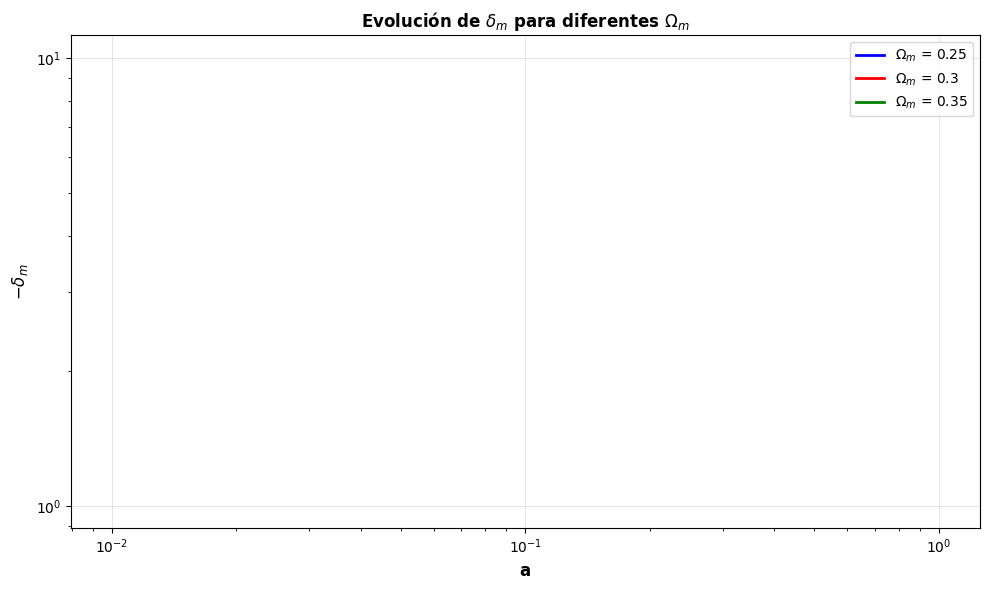

✅ Clase NumericalIntegrator funcionando correctamente!


In [228]:
# Ejemplo: Usar la clase para múltiples valores de Omega_m
omega_m_values = [0.25, 0.30, 0.35]
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(10, 6))

for i, Om_m_test in enumerate(omega_m_values):
    # Crear integrador para cada Omega_m
    integrator_test = NumericalIntegrator(
        Om_m_0=Om_m_test, 
        sigma8=0.8,
        n_points=500  # Menos puntos para ser más rápido
    )
    
    # Integrar con condiciones iniciales típicas
    a_test, delta_test, _ = integrator_test.integrate(
        delta_0=1e-5, 
        delta_prime_0=1e-5
    )
    
    # Graficar
    ax.plot(a_test, -delta_test, 
           color=colors[i], 
           linewidth=2, 
           label=f'$\Omega_m$ = {Om_m_test}')

ax.set_xlabel('a', fontweight='bold', fontsize=12)
ax.set_ylabel('$-\delta_m$', fontweight='bold', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha=0.3)
ax.legend()
ax.set_title('Evolución de $\delta_m$ para diferentes $\Omega_m$', fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Clase NumericalIntegrator funcionando correctamente!")

## Comparación CLASS vs CLASS

In [83]:
M1 = ft.common_settings(k=0.01, omega_m=.3, A_s=2.e-9, h=0.68)
M2 = ft.common_settings(k=0.01, omega_m=.3, A_s=2.e-9, h=0.68)
df1 = ft.get_df_from_M(M1)
df2 = ft.get_df_from_M(M2)

Om_m1 = M1.Omega_m()
Om_m2 = M2.Omega_m()
Om_b1 = M1.Omega_b()
Om_b2 = M2.Omega_b()
Om_cdm1 = Om_m1 - Om_b1
Om_cdm2 = Om_m2 - Om_b2

#delta_matter for both dfs:
df1['delta_matter'] = ft.compute_delta_m(df1['delta_cdm'], df1['delta_b'], Om_cdm1, Om_b1)
df2['delta_matter'] = ft.compute_delta_m(df2['delta_cdm'], df2['delta_b'], Om_cdm2, Om_b2)

display(df1.head())
display(df2.head())

,tau,a,delta_cdm,delta_b,delta_matter
0,7.087634,0.000015,-0.910411,-0.910411,-0.910411
1,7.087635,0.000015,-0.910411,-0.910411,-0.910411
2,7.087636,0.000015,-0.910411,-0.910411,-0.910411
3,7.087649,0.000015,-0.910411,-0.910411,-0.910411
4,7.087662,0.000015,-0.910411,-0.910411,-0.910411


,tau,a,delta_cdm,delta_b,delta_matter
0,7.087634,0.000015,-0.910411,-0.910411,-0.910411
1,7.087635,0.000015,-0.910411,-0.910411,-0.910411
2,7.087636,0.000015,-0.910411,-0.910411,-0.910411
3,7.087649,0.000015,-0.910411,-0.910411,-0.910411
4,7.087662,0.000015,-0.910411,-0.910411,-0.910411


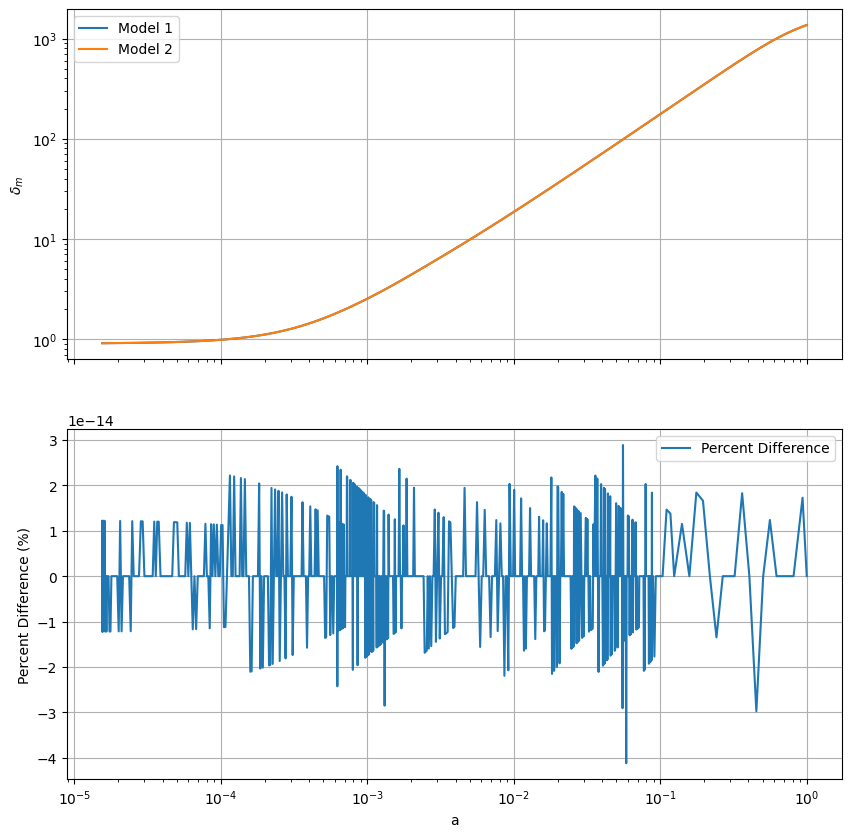

In [85]:
percent_diff = ft.percent_diff_vs_class(df1['a'], df1['delta_matter'], df2['a'], df2['delta_matter'])

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df1['a'], -df1['delta_matter'], label='Model 1')
axs[0].plot(df2['a'], -df2['delta_matter'], label='Model 2')
axs[0].set_ylabel('$\delta_m$')
#logscale in x
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].grid()

axs[1].plot(df1['a'], -percent_diff, label='Percent Difference')
axs[1].set_xlabel('a')
axs[1].set_ylabel('Percent Difference (%)')
axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[1].legend()
axs[1].grid()
